# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import necessary libraries to be used for this data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import tweepy
import re
import datetime
import random
import os
from matplotlib import cm
%matplotlib inline

In [2]:
# load the the provided enhanced archive data into Dataframe
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#display the first row of the data
#inspect the data
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#display the number of rows and columns in the archive tweets data
df_tae.shape

(2356, 17)

In [5]:
#display sample of the data in the dataframe
sample_tweet = df_tae.iloc[5]
sample_tweet

tweet_id                                                     891087950875897856
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-29 00:08:17 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have a majestic great white breaching ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891087950...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# use the request library to download the image prediction file using the link provided in the documentation
predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#download the data behind the url
response = requests.get(predict_url)
response


<Response [200]>

In [7]:
#open the response into a new name called predict_url
with open(predict_url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [8]:
ls *.tsv

image-predictions.tsv


In [9]:
# read image prediction file into DataFrame
df_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [10]:
# display the first 5 rows of the image prediction file 
#inspect the data
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# count tweets from image-predictions.tsv (number of tweets with images)
df_prediction.shape[0]

2075

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:

consumer_key = 'Confidential'
consumer_secret = 'Confidential'
access_token = 'Confidential'
access_secret = 'Confidential'

# configure connection (http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# create an API object 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
import time

start_time = time.time()
end_time = time.time()

In [14]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_tae.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
TweepError for id:  856330835276025856
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  851861385021730816
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259

In [15]:
tweet_json_file = 'tweet_json.txt'

In [16]:
# save the JSON data in the list to the output file
with open(tweet_json_file, 'w') as file:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, file)
        file.write('\n')

In [17]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33801
1,892177421306343426,5301,29336
2,891815181378084864,3481,22060
3,891689557279858688,7219,36903
4,891327558926688256,7762,35314
5,891087950875897856,2602,17815
6,890971913173991426,1664,10354
7,890729181411237888,15756,56822
8,890609185150312448,3622,24518
9,890240255349198849,6101,27945


In [18]:
# display row with tweet id 759923798737051648 for data inspection
df_tae[df_tae.tweet_id==759923798737051648]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None


In [19]:
#inspect the data 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [20]:
#convert tweet data to csv file
df_tweet.to_csv('tweet_data_extra.csv', index = False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [21]:
# Load the data gathered data files
df_tae = pd.read_csv('twitter-archive-enhanced.csv')
df_prediction = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
df_tweet = pd.read_csv('tweet_data_extra.csv')

**Twitter enhanced archive data**

In [22]:
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
df_tae.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [24]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
# check timestamp column type
type(df_tae.timestamp[0])

str

In [26]:

print("Data type for timestamp:  " + str(type(df_tae.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [27]:
print("Duplicated:  {}".format(sum(df_tae.duplicated())))

Duplicated:  0


In [28]:
df_tae.name.value_counts().head(50)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
the          8
Sadie        8
Bailey       7
Daisy        7
Buddy        7
an           7
Toby         7
Jax          6
Oscar        6
Leo          6
Bella        6
Stanley      6
Dave         6
Rusty        6
Koda         6
Jack         6
Scout        6
Milo         6
Larry        5
Chester      5
Oakley       5
George       5
Finn         5
Gus          5
Bentley      5
Alfie        5
Phil         5
Sunny        5
very         5
Sammy        5
Louis        5
Winnie       4
Jeffrey      4
Gary         4
Scooter      4
Walter       4
Boomer       4
Derek        4
Maggie       4
Name: name, dtype: int64

In [29]:
# list all names that are NOT capitalized
err_names_mask = df_tae.name.str.contains('^[a-z]', regex = True)
df_tae[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [30]:
len(df_tae[err_names_mask])

109

In [31]:
# number of tweets with missing urls
sum(df_tae.expanded_urls.isnull())

59

In [32]:
# how many tweets with missing urls are replies or retweets?
sum(df_tae.expanded_urls.isnull() & \
    (df_tae.in_reply_to_status_id.notnull() | \
     df_tae.retweeted_status_id.notnull()))

56

In [33]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = df_tae.expanded_urls.isna() & \
       df_tae.in_reply_to_status_id.isna() & \
       df_tae.retweeted_status_id.isna()
df_tae[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [34]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = df_prediction.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [35]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = df_tweet.tweet_id.isin(tweet_set)
df_tweet[find_tweet_id]

,tweet_id,retweet_count,favorite_count
358,828361771580813312,165,2071
687,785515384317313025,1166,5793
1417,696518437233913856,1573,3645


In [36]:
#display simple statistics for rating numerator and rating denominator
df_tae[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [37]:
#sorting the rating denominator from the largest to the smallest
df_tae.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
# display total number of denominator rating that is not equal to 10
sum(df_tae.rating_denominator != 10)

23

In [39]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (df_tae.rating_denominator != 10) & \
            df_tae.in_reply_to_status_id.isna() & \
            df_tae.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_tae[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [40]:
sum(mask_find)

17

In [41]:
#sorting the rating numerator from the largest to the smallest
df_tae.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [42]:
df_tweets_denom_10 = df_tae[df_tae.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [43]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

In [44]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (df_tae.rating_denominator == 10) & \
            (df_tae.rating_numerator >= 15) & \
            df_tae.in_reply_to_status_id.isna() & \
            df_tae.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_tae[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [45]:
df_tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
df_tae.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [47]:
df_tae.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [48]:
df_tae.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [49]:
df_tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [50]:
df_tae[df_tae.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

**Prediction data**

In [51]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
df_prediction.duplicated().sum()

0

In [53]:
df_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [54]:
df_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [55]:
df_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [56]:
df_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [57]:
# check out 20 of the entries that don't predict dogs
df_prediction[~df_prediction.p1_dog & \
               ~df_prediction.p2_dog & \
               ~df_prediction.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [58]:
sum(~df_prediction.p1_dog & \
               ~df_prediction.p2_dog & \
               ~df_prediction.p3_dog)

324

**Json_tweet data**

In [59]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [60]:
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33801
1,892177421306343426,5301,29336
2,891815181378084864,3481,22060
3,891689557279858688,7219,36903
4,891327558926688256,7762,35314


In [61]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.741728,7054.158573
std,6.820795e+16,4185.719388,10961.034709
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1226.000000
50%,7.178418e+17,1149.000000,3050.000000
75%,7.986547e+17,2861.500000,8601.500000
max,8.924206e+17,70759.000000,144926.000000


**Quality issues**

1. 181 of the tweets are retweets
 - need to remove these 181 rows because they are essentailly duplicates of original 

2. 78 of the tweets are replies to other tweets
 - need to remove these 78 rows b/c it doesn't help with our project motivation 

3. timestamp column is in string format 
   - needs to be in datetime format

    4.Denominator issues

5.missing expanded_urls values

6.There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

7.Tweets with invalid names

8. Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

### Tidiness issues
1.Data contains 4 columns for dog stages

2.Dataframe needs to be joined with the other two dataframes 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [62]:
# create copies of the dataframes for cleaning
df_tae_clean = df_tae.copy()
df_prediction_clean = df_prediction.copy()
df_tweet_clean = df_tweet.copy()

In [63]:
len_df_tae = df_tae_clean.shape[0]; len_df_tae

2356

### Issue #1:

#### Define:

Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [64]:
print("# of retweets:  {}".format(sum(df_tae_clean.retweeted_status_id.notnull())))

# of retweets:  181


In [65]:
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_id.isnull()]

#### Test

In [66]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [67]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_df_tae - df_tae_clean.shape[0]))
# reset the variable for length of the archive
len_df_tae = df_tae_clean.shape[0]

# of rows dropped:  181


### Issue #2:

#### Define

Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id

#### Code

In [68]:
print("# of replies:  {}".format(sum(df_tae_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [69]:
df_tae_clean = df_tae_clean[df_tae_clean.in_reply_to_status_id.isnull()]

#### Test

In [70]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [71]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_df_tae - df_tae_clean.shape[0]))
# reset the variable for length of the archive
len_df_tae = df_tae_clean.shape[0]

# of rows dropped:  78


**Issue #3:**

**Define**

Since we don't want retweets, we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Code**

In [72]:
df_tae_clean = df_tae_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

**Test**

In [73]:
list(df_tae_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Issue #4:**

**Define**

Since we don't want retweets, we can drop all columns related to retweets: in_reply_to_status_id',
                                    'in_reply_to_user_id

**Code**

In [74]:
df_tae_clean = df_tae_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

**Test**

In [75]:
list(df_tae_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Issue #5:**

**Define**

Convert timestamp to datetime data type.

**Code**

In [76]:
df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean.timestamp)
df_tae_clean['timestamp'] = df_tae_clean.timestamp.dt.floor('s')

**Test**

In [77]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


**Issue #6:**

**Define**

replace the source string with display portion of itself. extract the string between <a href="> and </a>"

**Code**

In [78]:
df_tae_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [79]:
df_tae_clean['source'] = df_tae_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test**

In [80]:
df_tae_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Issue #7:**

**Define**

Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

**Code**

In [81]:
# display denominators
df_tae_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        2
10     2080
7         1
2         1
Name: rating_denominator, dtype: int64

In [82]:
df_tae_clean = df_tae_clean[df_tae_clean.rating_denominator == 10]

**Test**

In [83]:
# display denominators, should only contain 10
df_tae_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

**Issue #8:**

**Define**

Drop tweets that have rating_numerator >= 15.

**Code**

In [84]:
# display numerators greater than 15
more = df_tae_clean.rating_numerator >= 15
df_tae_clean[more].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [85]:
df_tae_clean = df_tae_clean[df_tae_clean.rating_numerator < 15]

**Test**

In [86]:
# display ALL numerators
df_tae_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     38
13    287
12    486
11    413
10    436
9     152
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

**Issue #9**

**Define**

Drop tweets with missing data in the expanded_urls

**Code**

In [87]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.7+ KB


In [88]:
df_tae_clean = df_tae_clean[df_tae_clean.expanded_urls.notnull()]

**Test**

In [89]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
doggo                 2072 non-null object
floofer               2072 non-null object
pupper                2072 non-null object
puppo                 2072 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.4+ KB


**Issue #9**

**Define**

Melt the 4 columns with the dog stages:

**Code**

In [90]:
df_tae_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2072,2072,2072,2072
unique,2,2,2,2
top,None,None,None,None
freq,1989,2062,1844,2048


In [91]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

df_tae_clean.doggo = df_tae_clean.doggo.apply(make_dummy)
df_tae_clean.floofer = df_tae_clean.floofer.apply(make_dummy)
df_tae_clean.pupper = df_tae_clean.pupper.apply(make_dummy)
df_tae_clean.puppo = df_tae_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
df_tae_clean['none'] = df_tae_clean['doggo'] + df_tae_clean['floofer'] + \
                        df_tae_clean['pupper'] + df_tae_clean['puppo']


In [92]:
# have a look at what we have before we continue...
df_tae_clean['none'].value_counts()

0    1738
1     323
2      11
Name: none, dtype: int64

In [93]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
df_tae_clean['none'] = df_tae_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (df_tae_clean[stage[0]] == 1),
    (df_tae_clean[stage[1]] == 1),
    (df_tae_clean[stage[2]] == 1),
    (df_tae_clean[stage[3]] == 1),
    (df_tae_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
df_tae_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
df_tae_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
df_tae_clean['stage'] = df_tae_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

**Test**

In [94]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
stage                 2072 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 147.9+ KB


In [95]:
df_tae_clean.stage.value_counts()

none       1738
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

**Issue #10**

**Define**

Merge the retweet_count and favorite_count columns 
to the archive table, joining on tweet_id

**Code**

In [96]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [97]:
df_tae_clean = pd.merge(df_tae_clean, df_tweet_clean, 
                         on = 'tweet_id', how = 'left')

**Test**

In [98]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null datetime64[ns]
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
stage                 2072 non-null category
retweet_count         2064 non-null float64
favorite_count        2064 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 180.3+ KB


**Issue #11**

**Define**

Drop tweets with missing json_data.
Change the data type for the retweet_count and favorite_count to be int.

**Code**

In [99]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
df_tae_clean[df_tae_clean.retweet_count.isna() | df_tae_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
90,872261713294495745,NaN,NaN
202,844704788403113984,NaN,NaN
234,837366284874571778,NaN,NaN
284,829374341691346946,NaN,NaN
570,779123168116150273,NaN,NaN
681,759923798737051648,NaN,NaN
720,754011816964026368,NaN,NaN
1467,680055455951884288,NaN,NaN


In [100]:
df_tae_clean = df_tae_clean[~(df_tae_clean.retweet_count.isna() | df_tae_clean.favorite_count.isna())]

# recast the count columns to int type
df_tae_clean.retweet_count = df_tae_clean.retweet_count.astype(int)
df_tae_clean.favorite_count = df_tae_clean.favorite_count.astype(int)

**Test**

In [101]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2071
Data columns (total 11 columns):
tweet_id              2064 non-null int64
timestamp             2064 non-null datetime64[ns]
source                2064 non-null object
text                  2064 non-null object
expanded_urls         2064 non-null object
rating_numerator      2064 non-null int64
rating_denominator    2064 non-null int64
name                  2064 non-null object
stage                 2064 non-null category
retweet_count         2064 non-null int64
favorite_count        2064 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 179.6+ KB


**Issue #12**

**Define**

Replace all lowercase words in the name column with the string "none"

**Code**

In [102]:
names_mask = df_tae_clean.name.str.contains('^[a-z]', regex = True)
df_tae_clean[names_mask].name.value_counts().sort_index()

a               54
actually         2
all              1
an               5
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [103]:
df_tae_clean.loc[names_mask, 'name'] = "none"

**Test**

In [104]:
# All these entries were changed to "none"
df_tae_clean[names_mask].name.value_counts().sort_index()

none    101
Name: name, dtype: int64

**Issue #13**

**Define**

This is a 2-step process, first creating the columns in the predictions table, then merging to archive.

**Code**

In [105]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(df_prediction_clean['p1_dog'] == True),
              (df_prediction_clean['p2_dog'] == True),
              (df_prediction_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [df_prediction_clean['p1'], 
                 df_prediction_clean['p2'],
                 df_prediction_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [df_prediction_clean['p1_conf'], 
                      df_prediction_clean['p2_conf'], 
                      df_prediction_clean['p3_conf']]

# select the predicted breed based on the first successful condition
df_prediction_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
df_prediction_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

**Test**

In [106]:
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Code**

In [107]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
df_tae_clean = pd.merge(df_tae_clean, df_prediction_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
df_tae_clean.confidence = (df_tae_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
df_prediction_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

**Test**

In [108]:
df_tae_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,7009,33801,none,0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,5301,29336,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,3481,22060,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,7219,36903,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,7762,35314,basset,55


In [109]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 13 columns):
tweet_id              1941 non-null int64
timestamp             1941 non-null datetime64[ns]
source                1941 non-null object
text                  1941 non-null object
expanded_urls         1941 non-null object
rating_numerator      1941 non-null int64
rating_denominator    1941 non-null int64
name                  1941 non-null object
stage                 1941 non-null category
retweet_count         1941 non-null int64
favorite_count        1941 non-null int64
breed                 1941 non-null object
confidence            1941 non-null int64
dtypes: category(1), datetime64[ns](1), int64(6), object(5)
memory usage: 199.2+ KB


In [110]:
list(df_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

**Issues #14**

**Define**

Drop the rating_denominator column.
Rename the rating_numerator column to be ratin

**Code**

In [111]:
df_tae_clean.rating_denominator.value_counts()

10    1941
Name: rating_denominator, dtype: int64

In [112]:
df_tae_clean.drop(['rating_denominator'], axis = 1, inplace = True)
df_tae_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

**Test**

In [113]:
list(df_tae_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']

**Issues #14**

**Define**

Reorder the column placement: bring numerical columns to the left.
Drop the expanded_urls column.

**Code**

In [114]:
col_list = list(df_tae_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [115]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

df_tae_clean = df_tae_clean[col_list]

**Test**

In [116]:
df_tae_clean.head(2)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
0,892420643555336193,2017-08-01 16:23:56,13,7009,33801,none,0,Phineas,none,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27,13,5301,29336,Chihuahua,32,Tilly,none,Twitter for iPhone,This is Tilly. She's just checking pup on you....


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [117]:
df_tae_clean.to_csv('twitter_archive_master.csv', index = False)

In [118]:
import os
print(os.path.join('C:',os.sep, 'twitter_archive_master.csv'))

/twitter_archive_master.csv


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [119]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [120]:
# make a copy of the archive master table for analysis
we_rate_dogs = df_tae_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 1940
Data columns (total 11 columns):
tweet_id          1941 non-null int64
timestamp         1941 non-null datetime64[ns]
rating            1941 non-null int64
retweet_count     1941 non-null int64
favorite_count    1941 non-null int64
breed             1941 non-null object
confidence        1941 non-null int64
name              1941 non-null object
stage             1941 non-null category
source            1941 non-null object
text              1941 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 168.9+ KB


In [121]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 16:23:56'))

In [122]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1941.00000,1941.000000,1941.000000,1941.000000
mean,10.53220,2253.034518,7756.922205,46.015971
std,2.17569,4041.836893,11445.846106,33.827797
min,0.00000,11.000000,66.000000,0.000000
25%,10.00000,495.000000,1632.000000,13.000000
50%,11.00000,1081.000000,3475.000000,45.000000
75%,12.00000,2585.000000,9649.000000,77.000000
max,14.00000,70759.000000,144926.000000,99.000000


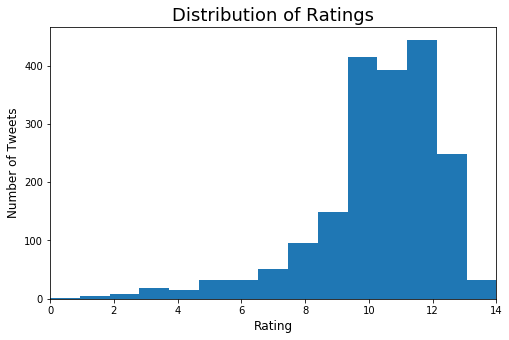

In [123]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 14)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 18)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14

In [124]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1533
Percentage of tweets:                79%


In [125]:
# How many tweets have favorite count <= retweet count?
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

In [126]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
756,744234799360020481,2016-06-18 18:26:18,13,70759,144926,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...
302,822872901745569793,2017-01-21 18:26:02,13,39934,124041,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...
391,807106840509214720,2016-12-09 06:17:20,13,51693,111728,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...
107,866450705531457537,2017-05-22 00:28:40,13,30215,108940,French_bulldog,90,Jamesy,pupper,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...
790,739238157791694849,2016-06-04 23:31:25,13,52912,107200,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...


In [127]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
756,744234799360020481,2016-06-18 18:26:18,13,70759,144926,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...
790,739238157791694849,2016-06-04 23:31:25,13,52912,107200,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...
391,807106840509214720,2016-12-09 06:17:20,13,51693,111728,Chihuahua,50,Stephan,none,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...
302,822872901745569793,2017-01-21 18:26:02,13,39934,124041,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...
58,879415818425184262,2017-06-26 19:07:24,13,37418,92839,English_springer,38,Duddles,none,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...


In [128]:
we_rate_dogs.stage.value_counts()

none       1640
pupper      200
doggo        70
puppo        23
floofer       8
Name: stage, dtype: int64

In [129]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  301
Percentage of tweets:          16%


In [130]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Dog Breed and number of tweets")
print("___________________________")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Dog Breed and number of tweets
___________________________
golden_retriever      153
Labrador_retriever    100
Pembroke               94
Chihuahua              89
pug                    62
toy_poodle             49
chow                   47
Samoyed                41
Pomeranian             40
malamute               33
Name: breed, dtype: int64

Top 10 dog breeds make up 36% of all tweets


### Visualization

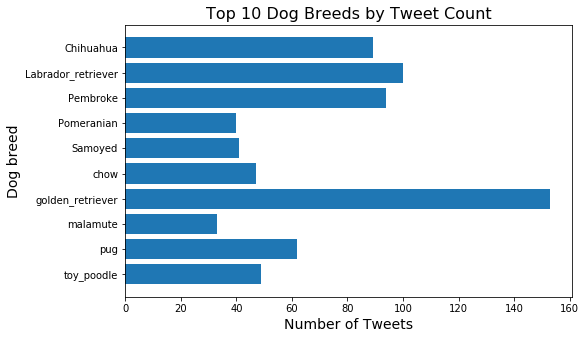

In [131]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
plt.ylabel('Dog breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

In [132]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1645409
Labrador_retriever    1021150
Pembroke               905258
Chihuahua              633129
French_bulldog         526211
Samoyed                482196
chow                   386716
cocker_spaniel         352241
pug                    325432
malamute               304605
Name: favorite_count, dtype: int64

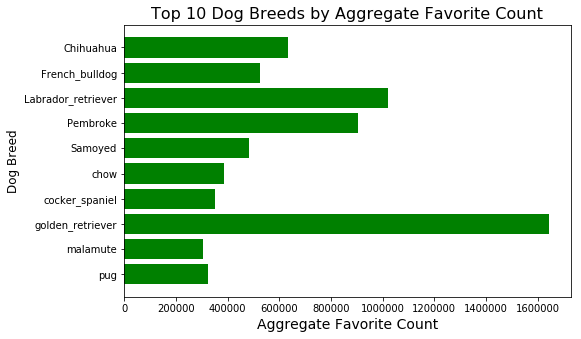

In [133]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

In [134]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['Samoyed',
 'malamute',
 'Labrador_retriever',
 'Chihuahua',
 'chow',
 'golden_retriever',
 'pug',
 'Pembroke']

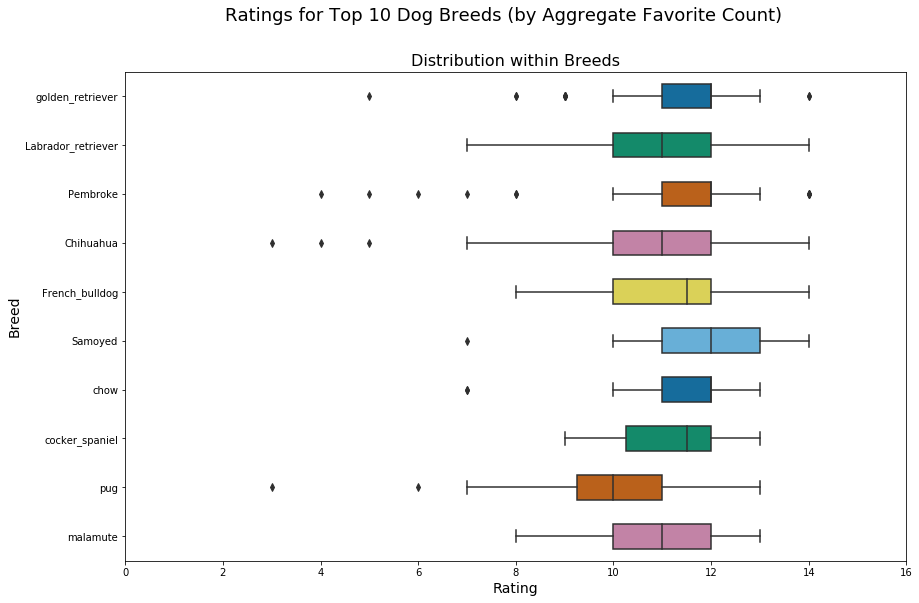

In [135]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

In [136]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [137]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = we_rate_dogs.timestamp.min()

# array with days corresponding to timestamp
we_rate_dogs_days = (we_rate_dogs.timestamp - first_day).apply(days_from_start)

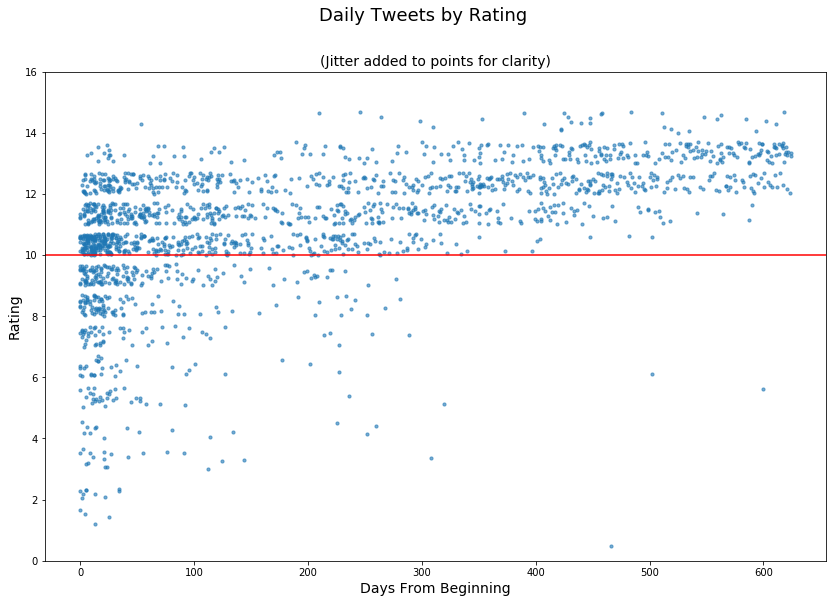

In [138]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = we_rate_dogs.rating.apply(jitter)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

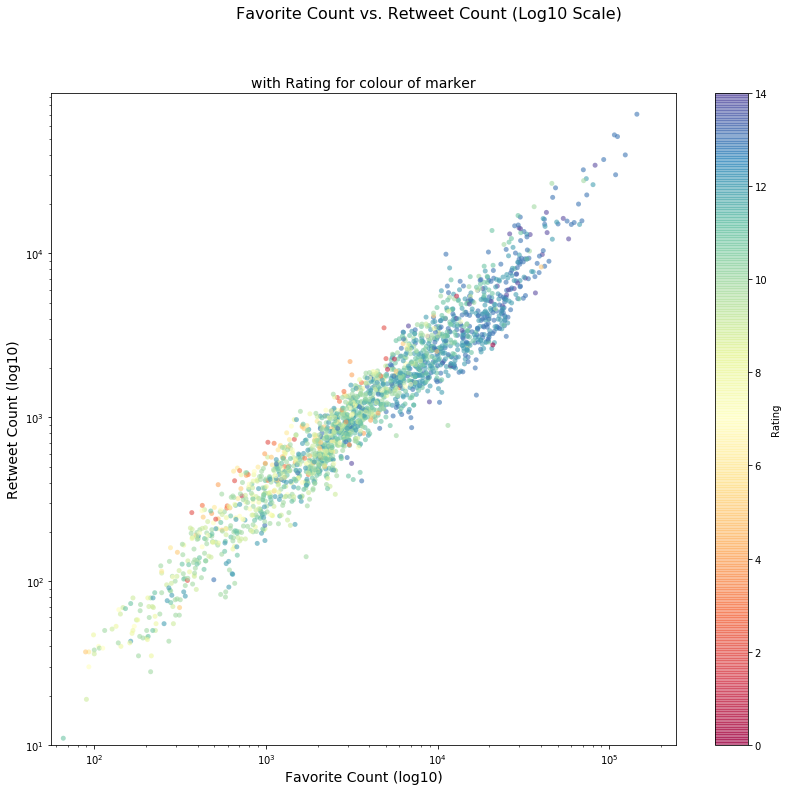

In [139]:

df = we_rate_dogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

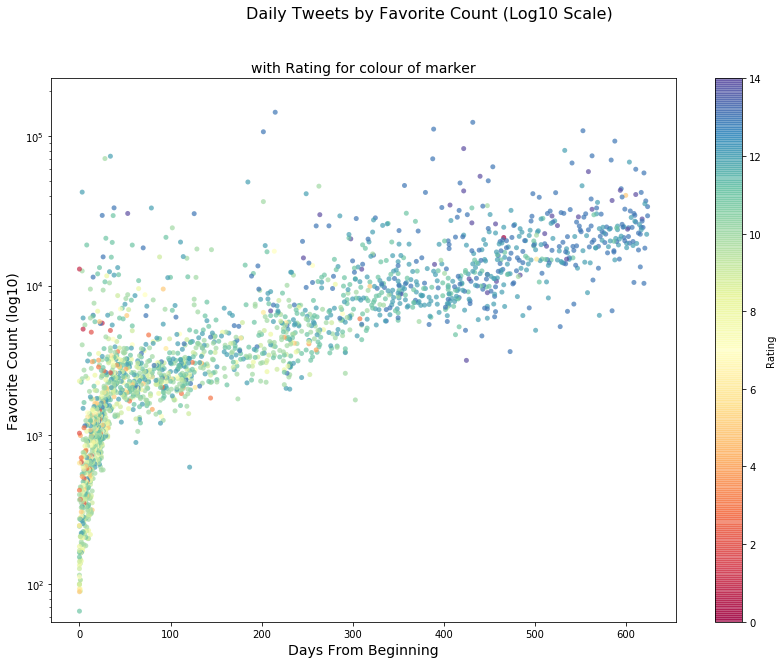

In [140]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(we_rate_dogs['favorite_count'].min() - 10, 
         we_rate_dogs['favorite_count'].max() + 100000)
colours = we_rate_dogs['rating']
markers = 25

plt.scatter(we_rate_dogs_days, we_rate_dogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

### Insights:
1.Higher Ratings Mean Higher Retweets and Favourites

2.people Love Retrievers

3.Strong Relationship Between Favourite Count And Retweet Count